In [1]:
%matplotlib inline

In [2]:
from clawpack.geoclaw import dtopotools
import numpy as np

In [3]:
# add two subfaults

#subfault0
subfault0 = dtopotools.SubFault()
subfault0.slip = 1.
subfault0.coordinate_specification = 'triangular'
subfault0._corners = [[.1,0.,-10e3],[0.,.1,-20e3],[.1,.1,-10e3]]
subfault0.calculate_geometry_triangles()
subfault0.rake = 180.

In [4]:
subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [[.5,0.,-1e3],[0.,.5,-1e3],[.5,.5,0.]]
subfault1.calculate_geometry_triangles()

In [5]:
subfault0._get_leg_angles()

([[0.1, 0.0, -10000.0], [0.1, 0.1, -10000.0], [0.1, 0.1, -10000.0]],
 [[0.0, 0.1, -20000.0], [0.0, 0.1, -20000.0], [0.1, 0.0, -10000.0]],
 [5.497787143782138, 4.7123889803846897, 3.141591130533659],
 [1.0041366436096268, 0.83808217165089993, 1.5707963267948966])

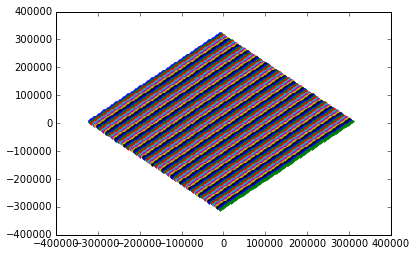

In [6]:
O1_list,O2_list,alpha_list,beta_list = subfault0._get_leg_angles()
xx = np.linspace(-2,2,100)
X1,X2 = np.meshgrid(xx,xx)
X3= np.zeros(X1.shape)

alpha = alpha_list[0]
beta = beta_list[0]
Olong = O1_list[0][0]
Olat = O1_list[0][1]
Odepth = - O1_list[0][2]
Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
    subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

import matplotlib.pyplot as pl

pl.plot(Y1,Y2,'.');

In [7]:

v13 = np.zeros(X1.shape)
v23 = np.zeros(X1.shape)
v33 = np.zeros(X1.shape)


for j in range(3):
    alpha = alpha_list[j]
    beta = beta_list[j]
    Olong = O1_list[j][0]
    Olat = O1_list[j][1]
    Odepth = -O1_list[j][2]
    
    Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
        subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 =subfault0._get_angular_dislocations(Y1,Y2,Y3,Z1,Z2,Z3,\
                                  Yb1,Yb2,Yb3,Zb1,Zb2,Zb3,beta,Odepth)
    
    v13 = v13 + w13
    v23 = v23 + w23
    v33 = v33 + w33
    
for j in range(3):
    alpha = alpha_list[j]
    beta = beta_list[j]
    Olong = O2_list[j][0]
    Olat = O2_list[j][1]
    Odepth = -O2_list[j][2]
    
    Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
        subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 =subfault0._get_angular_dislocations(Y1,Y2,Y3,Z1,Z2,Z3,\
                                  Yb1,Yb2,Yb3,Zb1,Zb2,Zb3,beta,Odepth)
    
    v13 = v13 + w13
    v23 = v23 + w23
    v33 = v33 + w33
    

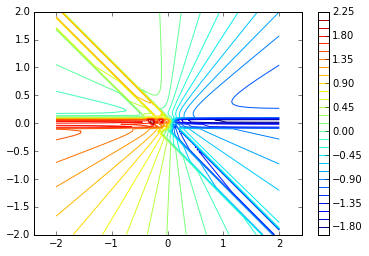

In [12]:
pl.contour(X1,X2,0.*v13 + 0.*v23 + 1.*v33,30);
pl.colorbar();
pl.axis('equal');

In [34]:
np.meshgrid?

In [35]:
subfault0.corners

[[0.1, 0.0, -10000.0], [0.0, 0.1, -20000.0], [0.1, 0.1, -10000.0]]

In [36]:
from numpy import pi

# subfault0._get_halfspace_coords?
X1 = np.array([0.])
X2 = np.array([0.])
X3 = np.array([0.])

Olong = subfault0.corners[0][0]
Olat = subfault0.corners[0][1]
Odepth = subfault0.corners[0][2]

Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
    subfault0._get_halfspace_coords(X1,X2,X3,np.pi/2.,np.pi/3,Olong,Olat,Odepth)

In [37]:
import numpy as np

xx = np.linspace(0,1,10)

In [38]:
1/xx

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


array([        inf,  9.        ,  4.5       ,  3.        ,  2.25      ,
        1.8       ,  1.5       ,  1.28571429,  1.125     ,  1.        ])

In [39]:
0.5**2 + 0.8660254**2

0.9999999934451599

In [40]:
# choose number of Gaussian quadrature points
subfault0.n_gauss_pts = 20
subfault1.n_gauss_pts = 40

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


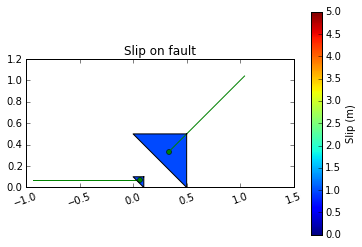

In [41]:
fault0 = dtopotools.Fault(subfaults=[subfault0,subfault1])

fault0.plot_subfaults(slip_color=True,plot_rake=True,cmin_slip=0.,cmax_slip=5.)

In [42]:
print fault0.Mw()
print subfault0.length * subfault0.width * (dtopotools.LAT2METER)**2

7.17570547677
1.02601764163e+18


In [43]:
subfault0.rake * dtopotools.DEG2RAD / np.pi

1.0

In [44]:
# generate dtopo
x,y = fault0.create_dtopo_xy(buffer_size=0.1)
dtopo = fault0.create_dtopography(x,y,times=[0.])

# plot deformation dZ at time 0.
dtopo.plot_dZ_colors(0.)

NameError: global name 'alpha' is not defined

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(-1.,1.,200)
y = np.linspace(-1.,1.,200)

Dtopo = subfault0.okada(x,y)

In [ ]:
print subfault0.dtopo.dZ[0,:,:].shape
print subfault0.slip
print subfault0.dip

In [ ]:
dtopotools.LAT2METER

In [ ]:
import matplotlib.pyplot as pl

# pl.pcolor(Dtopo.X,Dtopo.Y,Dtopo.dZ[0,:,:])
# pl.colorbar()

Dtopo.plot_dZ_colors(0.)

In [ ]:
x,w = subfault0.gauss_pts

In [ ]:
np.array?

In [ ]:
slab_pts = np.loadtxt('cas_slab1.0_clip.xyz')

In [ ]:
from scipy.spatial import Delaunay

tri = Delaunay(slab_pts[:,0:2])


In [ ]:
I = np.invert(np.isnan(slab_pts[:,2]))
c4e = []
for j in range(tri.nsimplex):
    node_list = tri.simplices[j,:].tolist()
    if I[node_list[0]] and I[node_list[1]] and I[node_list[2]] :
        c1 = slab_pts[node_list[0],:].tolist()
        c2 = slab_pts[node_list[1],:].tolist()
        c3 = slab_pts[node_list[2],:].tolist()
        if (c2[1] > 49.7) and (c2[0] > -125.):
            c4e.append([c1,c2,c3])

In [ ]:
import copy

subfaults = []



# j = 20

# subfault0 = dtopotools.SubFault()
# subfault0.coordinate_specification = 'triangular'
# subfault0.slip = 5.
# subfault0._corners = c4e[j]
# subfault0.calculate_geometry_triangles()
# subfaults.append(copy.copy(subfault0))

# N = min([100,len(c4e)])
N = len(c4e)
for j in range(N):
    subfault0 = dtopotools.SubFault()
    subfault0.coordinate_specification = 'triangular'
    subfault0.slip = 5.
    subfault0._corners = c4e[j]
    subfault0.calculate_geometry_triangles()
    subfaults.append(copy.copy(subfault0))


In [ ]:
fault1 = dtopotools.Fault(subfaults=subfaults)

In [ ]:
fault1.containing_rect()

In [ ]:
import matplotlib.pyplot as pl

f,ax = pl.subplots(figsize=(20,20))
ax = fault1.plot_subfaults(axes=ax,plot_rake=True,slip_color=False,cmin_slip=0., cmax_slip=5.,verbose=True)